In [ ]:
# to check candida length distribution 

In [1]:
import numpy as np
import pandas as pd
import gzip
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats 

In [ ]:
## 1. Supp_Figure_8b ---  ---

In [2]:
# fq to lists (id list and seq list)
# two lists: one holds ID, the other one holds seq

fq_url = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/final_pass+fail.vitro.fastq.gz'
i = 1
tmp_id_ls = []
tmp_seq_ls = []
with gzip.open(fq_url, 'r') as fq:
    for line in fq:
        line = line.decode('ASCII')
        line = line.replace('\n', '')
        if i % 4 == 1:
            ID = line.split()[0][1:]
            tmp_id_ls.append(ID)  # list holds ids
        elif i % 4 == 2:
            seq = line
            tmp_seq_ls.append(seq)  # list holds seqs
        i+=1

# change lists to dataframe
original_seq_df = pd.DataFrame([tmp_id_ls, tmp_seq_ls]).T
original_seq_df = original_seq_df.rename(columns={0: 'ID', 1:'seq'})
original_seq_df.head(2)
original_seq_df.shape
original_seq_df.to_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/original_seq_df_vitro.txt',sep='\t')

/tmp/ipykernel_19880/1472495965.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_plot['class'] = 'pass'
/tmp/ipykernel_19880/1472495965.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_plot['class'] = 'fail'
/tmp/ipykernel_19880/1472495965.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  length =

       Unnamed: 0      length
class                        
fail    1231270.0  367.027365
pass     432758.5  533.830805


/tmp/ipykernel_19880/1472495965.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  length = dplot.groupby(['class']).median()


       Unnamed: 0  length
class                    
fail    1231270.0   308.0
pass     432758.5   465.0


<Figure size 432x288 with 0 Axes>

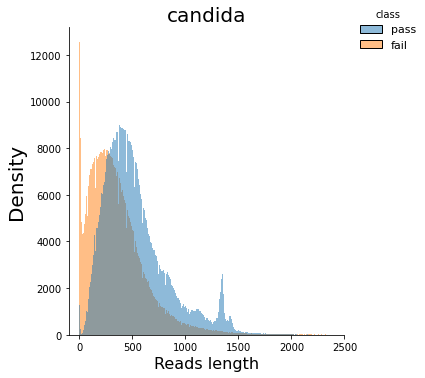

In [7]:
### separate the pass + failed reads

original_seq_df = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/original_seq_df_vitro.txt',sep='\t')
original_seq_df['length'] = original_seq_df['seq'].str.len()
original_seq_df 

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/'
seqsum = pd.read_csv(dir+'/sequencing_summary_vitro.txt',sep='\t')
seqsum = seqsum[['read_id','passes_filtering']]


pass_read = seqsum[seqsum['passes_filtering'] == True]
fail_read = seqsum[seqsum['passes_filtering'] == False]

pass_plot = original_seq_df[original_seq_df['ID'].isin(list(pass_read.read_id))]
fail_plot = original_seq_df[original_seq_df['ID'].isin(list(fail_read.read_id))]
pass_plot['class'] = 'pass'
fail_plot['class'] = 'fail'
dplot = pd.concat([pass_plot,fail_plot]) 

length = dplot.groupby(['class']).mean()
print(length)
length = dplot.groupby(['class']).median()
print(length)

plt.figure(figsize=(6,4))
g=sns.displot(data=dplot, x='length', hue='class') #hue='gene',  kde=True
plt.xlabel('Reads length',fontsize = 16)
plt.ylabel('Density',fontsize = 20)
plt.title("candida",fontsize = 20)
plt.xlim([-100, 2500])
sns.move_legend(g, "upper right",fontsize = 11)   #bbox_to_anchor=(1,1)
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/'
plt.savefig(dir_out+'Supp_Figure_8b_QC_quality_read_length_candida_vitro.pdf',bbox_inches='tight', dpi=300) 

In [ ]:
## 2. Supp_Figure_8f ---  --- 

0.8431679964292489


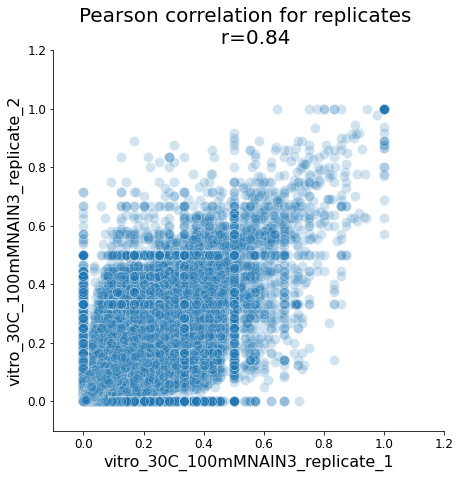

In [8]:
rep_1 = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/vitro_30C_100mMNAIN3_all_mod_rep1.txt', header=None,sep='\t')
rep_1.columns = ['raw_index','position','mut','coverage','mod_rate','transcript']
rep_1['replicate'] = 'replicate_1'
rep_1['id'] = rep_1['transcript'] + '_' + rep_1['position'].astype(str)

rep_2 = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/vitro_30C_100mMNAIN3_all_mod_rep2.txt', header=None,sep='\t')
rep_2.columns = ['raw_index','position','mut','coverage','mod_rate','transcript']
rep_2['replicate'] = 'replicate_2'
rep_2['id'] = rep_2['transcript'] + '_' + rep_2['position'].astype(str)

df_merge = pd.merge(rep_1,rep_2,how='inner',on=['id','id'])

plt.figure(figsize=(7,7))
sns.scatterplot(data=df_merge,  x=df_merge.mod_rate_x, y=df_merge.mod_rate_y,  s=100, alpha=0.2)    #color="steelblue"
sns.despine()

res = stats.pearsonr(df_merge.mod_rate_x, df_merge.mod_rate_y)
print(res[0])

plt.title("Pearson correlation for replicates \n  r=""{:.2f}".format(res[0]),fontsize=20)
plt.xlabel("vitro_30C_100mMNAIN3_replicate_1",fontsize=16)
plt.ylabel("vitro_30C_100mMNAIN3_replicate_2",fontsize=16)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.xlim(-0.1,1.2) 
plt.ylim(-0.1,1.2) 
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig8/Data/'
plt.savefig(dir_out+'Supp_Figure_8f_QC_quality_candida_replicate_correlation_vitro.pdf',bbox_inches='tight', dpi=300) 